In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

Logistic Regression Accuracy:  0.916
Neural Network Accuracy:  0.9344999999999999


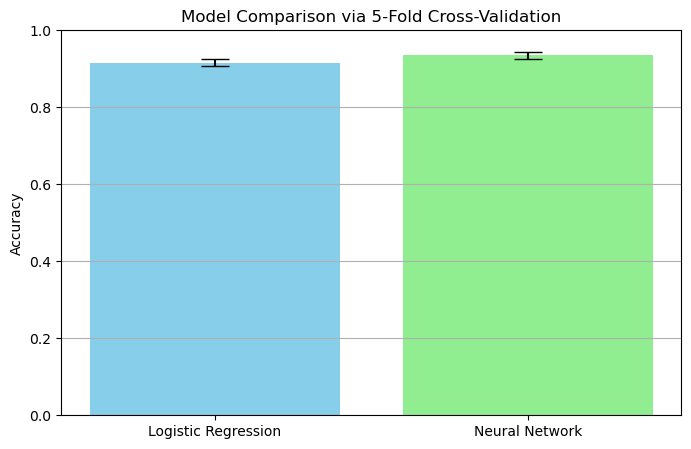

In [12]:
MNIST = pd.read_csv('Numbers.txt', delim_whitespace=True)

X = MNIST.iloc[:, 1:].values
y = MNIST.iloc[:, 0].values

LR_pipe = make_pipeline(StandardScaler(), 
                        LogisticRegression(max_iter=10000, solver = 'lbfgs'))

NN_pipe = make_pipeline(StandardScaler(), 
                        MLPClassifier(hidden_layer_sizes = (1000,) , max_iter=10000, solver='adam', random_state=42))


cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_score = cross_val_score(LR_pipe, X, y, cv=cv, scoring='accuracy')
NN_score = cross_val_score(NN_pipe, X, y, cv=cv, scoring='accuracy')

print("Logistic Regression Accuracy: ", log_score.mean())
print("Neural Network Accuracy: ", NN_score.mean())    

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.bar(["Logistic Regression", "Neural Network"], 
        [log_score.mean(), NN_score.mean()], 
        yerr=[log_score.std(), NN_score.std()],
        capsize=10, color=['skyblue', 'lightgreen'])

plt.ylabel("Accuracy")
plt.title("Model Comparison via 5-Fold Cross-Validation")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()


Logistic Regression Nested CV Accuracy:  0.9209999999999999
Neural Network Nested CV Accuracy:  0.9349999999999999


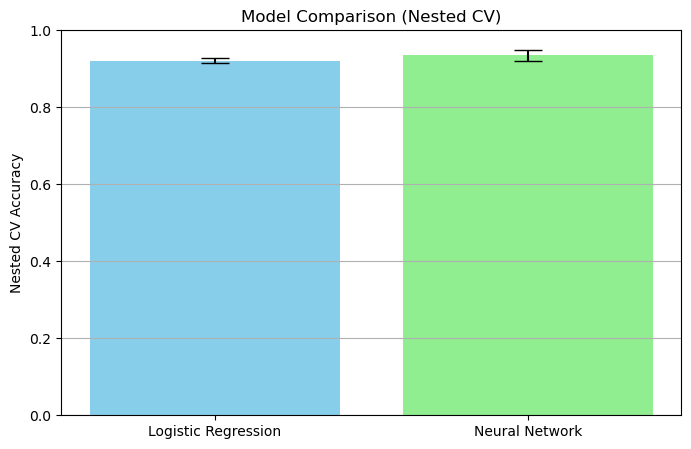

In [18]:
y = MNIST.iloc[:, 0].values
X = MNIST.iloc[:, 1:].values

outer_CV = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#Logitistic Regression
lr_pipe = make_pipeline(StandardScaler(), 
                        LogisticRegression( max_iter=10000, solver = 'lbfgs'))

lr_param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100]}

lr_grid_search = GridSearchCV(lr_pipe, lr_param_grid, cv = 3, scoring='accuracy')
lr_nested_scores = cross_val_score(lr_grid_search, X, y, cv=outer_CV, scoring='accuracy')
print("Logistic Regression Nested CV Accuracy: ", lr_nested_scores.mean())


#Neural Network
nn_pipe = make_pipeline(StandardScaler(),MLPClassifier(max_iter=300, solver='adam', random_state=42))

nn_param_grid = {'mlpclassifier__hidden_layer_sizes': [(100,), (200,), (100, 100)],
                 'mlpclassifier__alpha': [0.0001, 0.001, 0.01]}

nn_grid_search = GridSearchCV(nn_pipe, nn_param_grid, cv = 3, scoring='accuracy')
nn_nested_scores = cross_val_score(nn_grid_search, X, y, cv=outer_CV, scoring='accuracy')
print("Neural Network Nested CV Accuracy: ", nn_nested_scores.mean())


plt.figure(figsize=(8, 5))
plt.bar(["Logistic Regression", "Neural Network"],
        [lr_nested_scores.mean(), nn_nested_scores.mean()],
        yerr=[lr_nested_scores.std(), nn_nested_scores.std()],
        capsize=10, color=['skyblue', 'lightgreen'])

plt.ylabel("Nested CV Accuracy")
plt.title("Model Comparison (Nested CV)")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()
